In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('/content/train.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 1.  Summary statistics

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## 2. Missing value heatmap

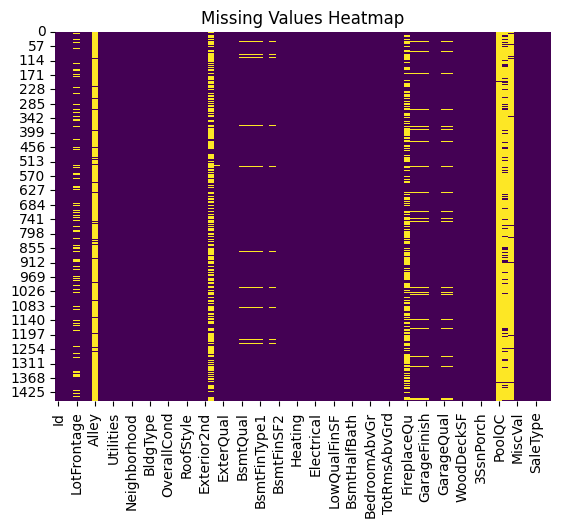

In [7]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

🧠 Inference:
Several features like PoolQC, FireplaceQu, and Alley have a high percentage of missing values and may need to be dropped or specially handled.

## 3. Histograms of numerical features

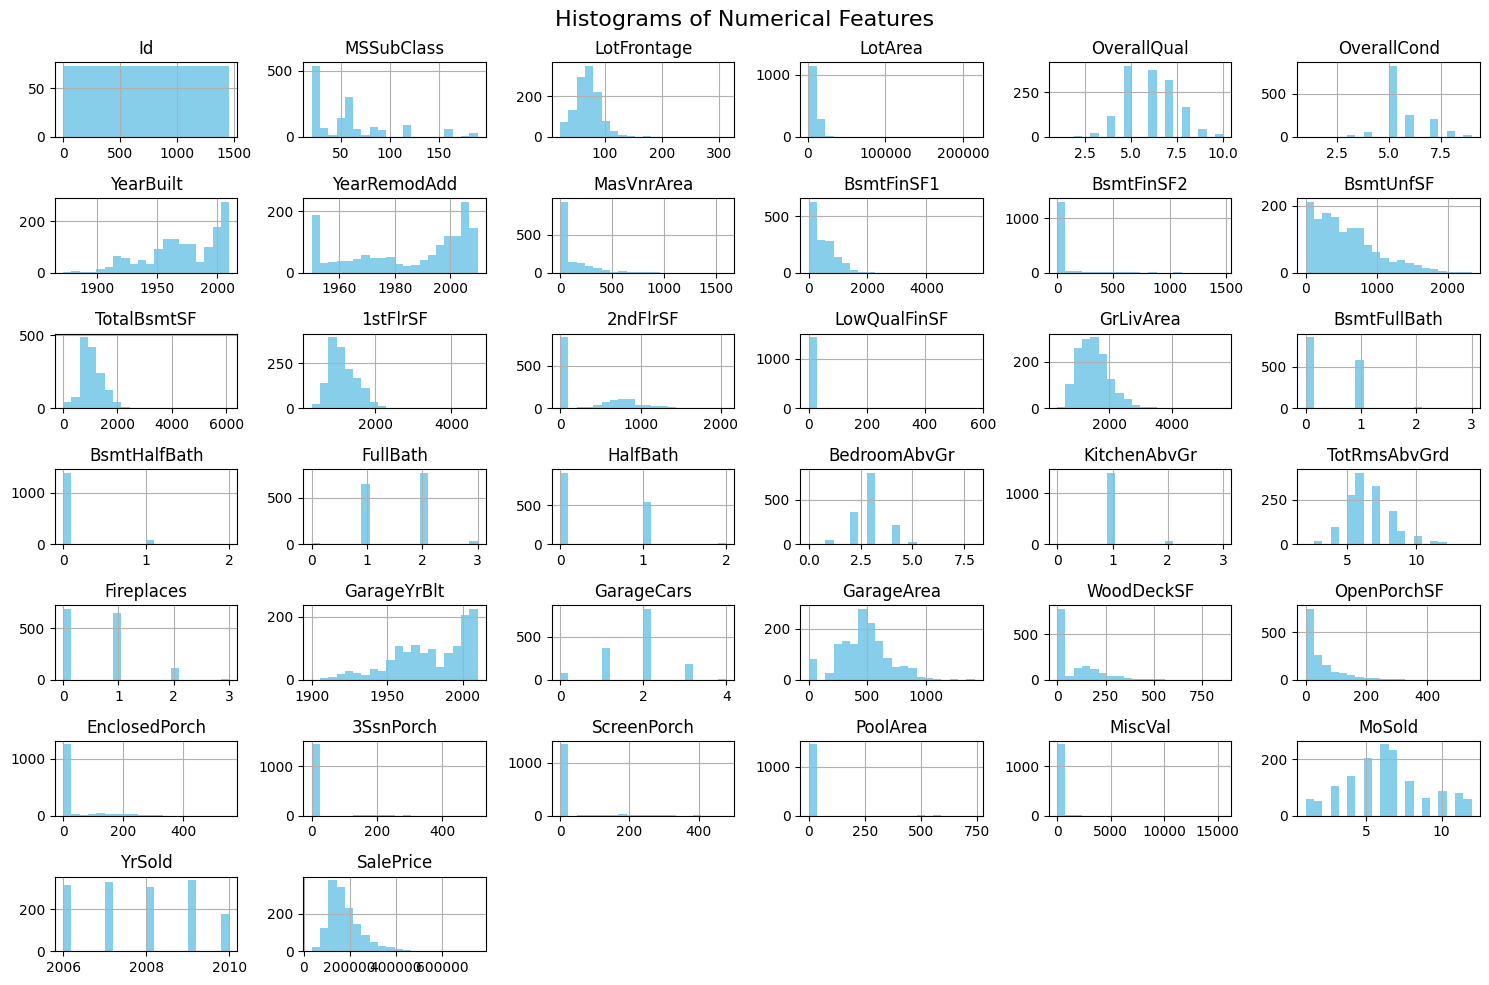

In [8]:
df.hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

🧠 Inference:

Most numerical features like LotArea and SalePrice are right-skewed, indicating the need for log transformation.

## 4.Boxplots for key features

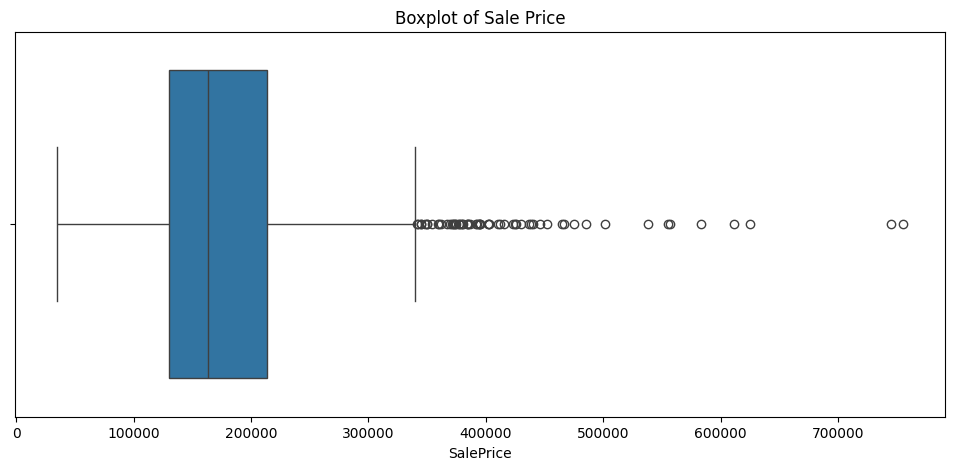

In [9]:
plt.figure(figsize=(12, 5))
sns.boxplot(x=df['SalePrice'])
plt.title("Boxplot of Sale Price")
plt.show()

Through this boxplot, we can clearly see that some houses were sold at very high prices beyond normal range. These are considered as outliers. We can Remove them using following function

In [10]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]


df = remove_outliers(df, 'SalePrice')

🧠 Inference:

The boxplot reveald significant outliers in high-value properties, which could impact model performance if not handled.

## 5.Correlation matrix

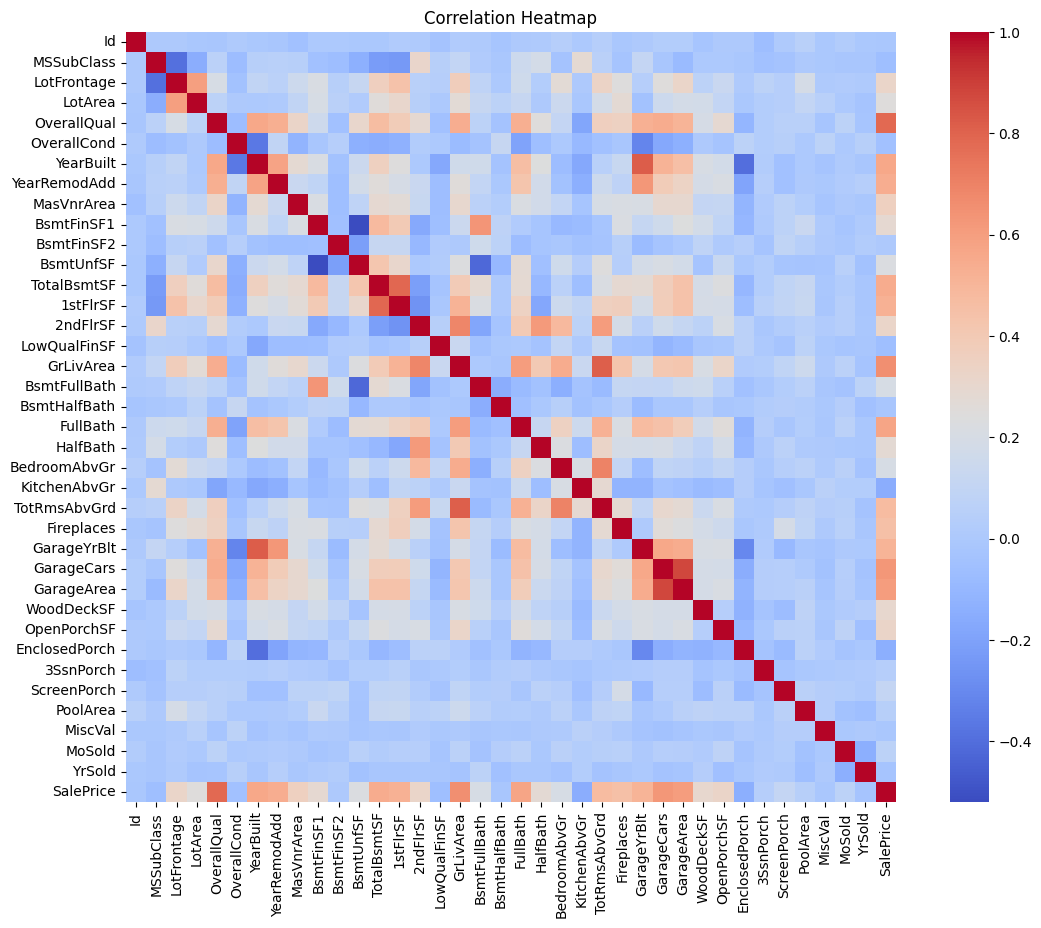

In [11]:
plt.figure(figsize=(14, 10))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, square=True)
plt.title("Correlation Heatmap")
plt.show()

🧠 Inference:

OverallQual, GrLivArea, GarageCars, and TotalBsmtSF show strong positive correlation with SalePrice.

In [12]:
top_corr = corr['SalePrice'].abs().sort_values(ascending=False).head(10)
print("\n🔍 Top 10 Correlated Features with SalePrice:")
print(top_corr)


🔍 Top 10 Correlated Features with SalePrice:
SalePrice       1.000000
OverallQual     0.784294
GrLivArea       0.661325
GarageCars      0.628013
GarageArea      0.607230
FullBath        0.577369
YearBuilt       0.564558
TotalBsmtSF     0.543508
YearRemodAdd    0.541161
1stFlrSF        0.522785
Name: SalePrice, dtype: float64


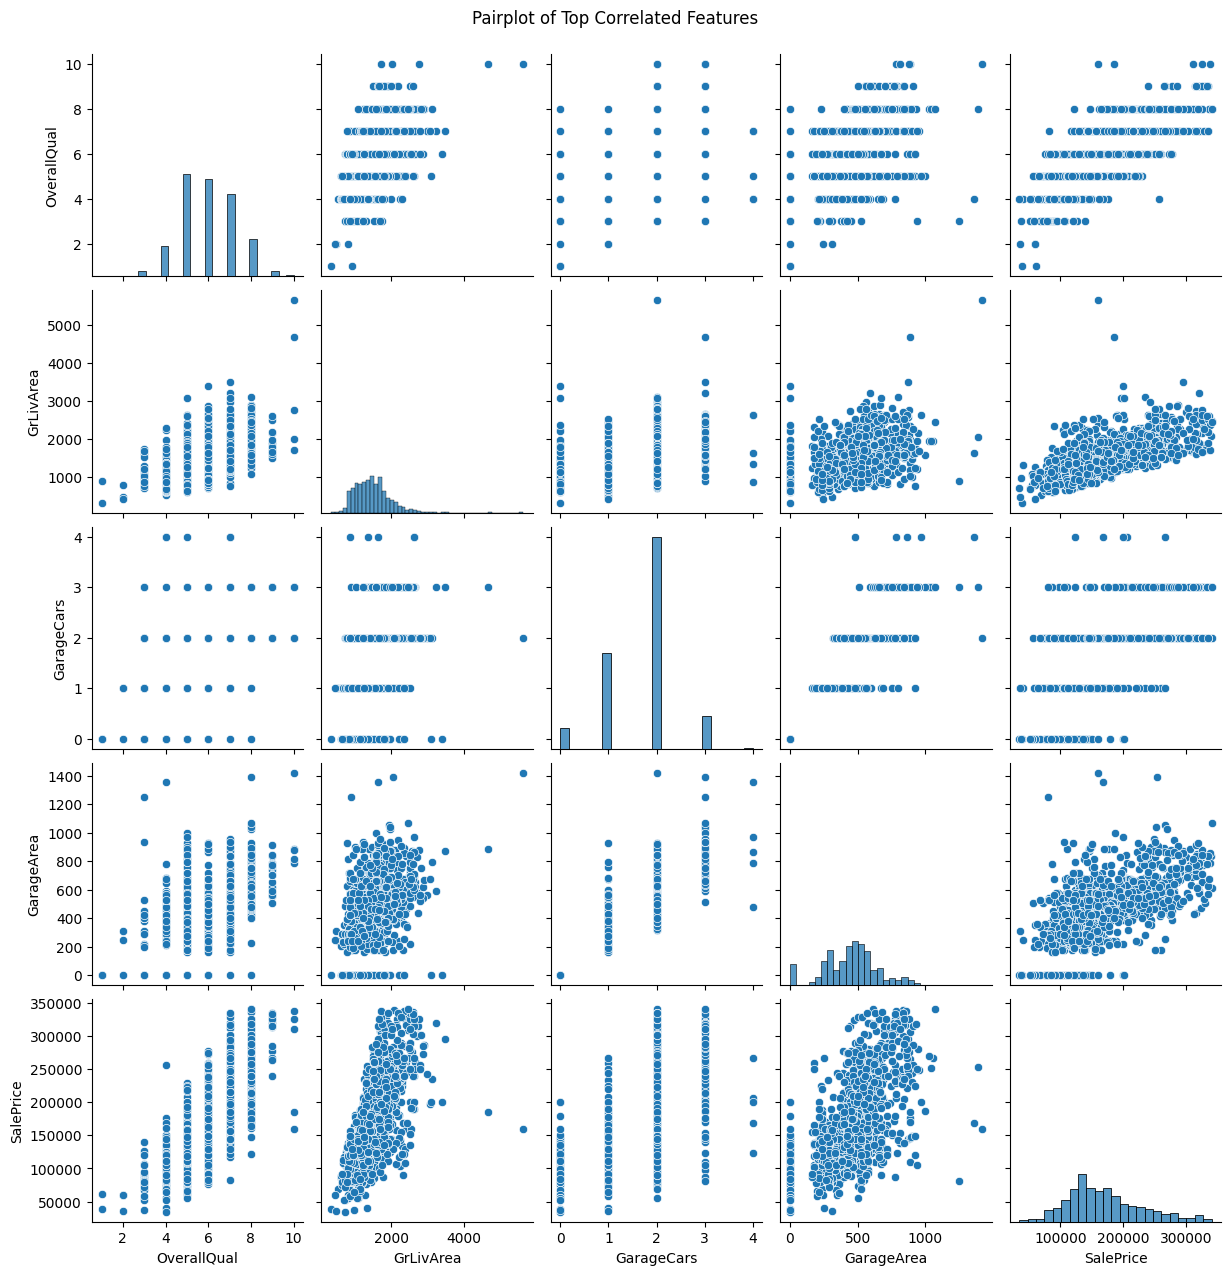

In [13]:
top_features = top_corr.index[1:5]
sns.pairplot(df[top_features.tolist() + ['SalePrice']])
plt.suptitle("Pairplot of Top Correlated Features", y=1.02)
plt.show()

### 🧠 Summary of EDA Insights

- `SalePrice` is **right-skewed** → apply **log transformation** for better distribution.
- Strongest predictors: `OverallQual`, `GrLivArea`, `GarageCars`, `TotalBsmtSF`.
- Higher **build quality**, **bigger homes**, and **larger garages** increase house price.
- **Neighborhood** matters: houses in `NridgHt`, `StoneBr` are priced higher.
- Some features like `LotArea` and `GrLivArea` are **positively skewed**.
- **Outliers** exist in size and price features → consider removing them.

These insights guide feature selection, transformation, and model building.

